# ModSim - Exercise 1

### Task 1a)


This was solved using newtons second law:
$$
\sum F = m \ddot{x},
$$

Where we sub in

$$
\sum F = -d\dot{x} - kx
$$

Which leads to the final (and well known) differential equation

$$
\ddot{x}+\frac{d}{m}\dot{x}+\frac{k}{m}x = 0
$$

### Task 1b)

We use the states $x$ and $v = \dot{x}$, and can then rewrite as

$$
\dot{x} = v,
$$

$$
\dot{v} = -\frac{d}{m}v - \frac{k}{m}x
$$

### Task 1c)

The by-hand solution was trivial, but slightly tedious, so most of the calculations have been omitted. The gist of it was to set up the characteristic equation of the system, which was

$$
r^2 + 0.7r + 1 = 0,
$$

which had the solutions

$$
r \approx -0.35 \pm i 0.935.
$$

These roots yield the solution

$$
x(t) = e^{-0.35t}(A \cos(0.935t)+B\sin(0.935t)).
$$

Using the initial conditions $x(0) = 1$ and $\dot{x}(0) = 0$, we got that $A=1$ and $B \approx 0.374$. Thus the final solution is

$$
x(t) = e^{-0.35t}(\cos(0.935t)+0.374 \sin(0.935t)).
$$

Note that I solved this before realizing that damping should be set to zero. With this small addition, the solution simply becomes

$$
x(t) = \cos(t)
$$

In [1]:
from sympy import Function, dsolve, Derivative, simplify, symbols, solve, Eq, diff, Number
from sympy.abc import x

In [2]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

In [15]:
def solve_analytic(d, k, m):
    y = Function('y')
    result = dsolve((Derivative(y(x), x, x) + d/m * Derivative(y(x), x) + k/m * y(x)), y(x))

    cnd0 = Eq(result.rhs.subs(x, 0), 1)
    cnd1 = Eq(diff(result.rhs, x).subs(x, 0), 0)

    C1, C2 = symbols("C1, C2")

    C1C2_solutions = solve([cnd0, cnd1], (C2, C1))

    return simplify(result.rhs.subs(C1C2_solutions))

y = Function('y')

# y_solution = solve_analytic(0, 1, 1)
print("Solutions with initial conditions: ")
display(Eq(y(x), round_expr(solve_analytic(0.7, 1, 1), 3)))

Solutions with initial conditions: 


Eq(y(x), (0.374*sin(0.937*x) + 1.0*cos(0.937*x))*exp(-0.35*x))

As we can see, the solution was indeed correct, apart from some small rounding errors.

### Task 1d)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import plot

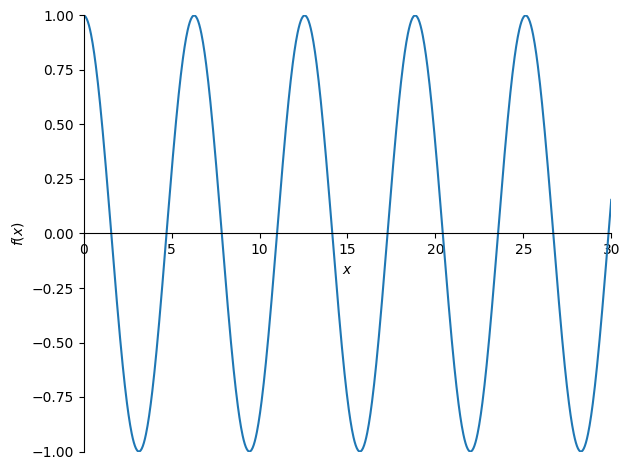

In [17]:
plot(solve_analytic(0.0, 1, 1), (x, 0, 30), xlim=(0, 30), ylim=(-1, 1))

We can see that the position of the mass exhibits undamped oscillations, as we would expect when there is no friction / damping in the mass-spring system.

### Task 2a)

The forward Euler integration method is a simple method for solving ODEs that integrates by assuming that the growth rate of the function is constant over the timestep. This often leads to large errors in the solution estimate unless the timestep is very small. However, forward Euler shines in its simplicity, which makes it a great example for simple-brained students. It is also so-called numerically unstable, which means that for certain steeply growing functions or with too large step sizes it may not converge.

### Task 2b)

In [11]:
import numpy as np
from sympy import lambdify

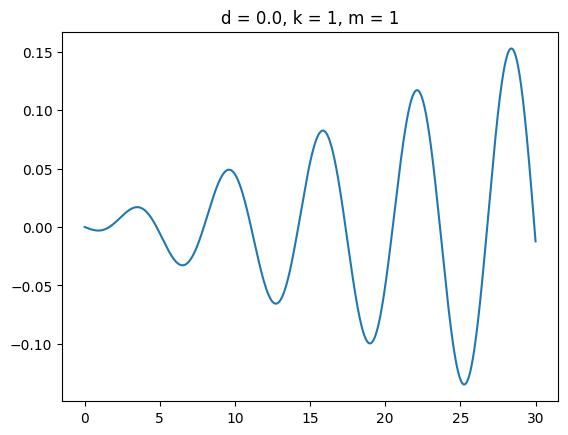

In [8]:
N_STEPS = 3000
T_END = 30
h = T_END / N_STEPS

def x_dot(v):
    return v

def v_dot(x, v, d, k, m):
    return -d/m * v - k/m * x

def solve_euler(d, k, m):
    x_values = np.zeros(N_STEPS)
    x_values[0] = 1
    v_values = np.zeros(N_STEPS)
    for i in range(N_STEPS - 1):
        x_values[i + 1] = x_values[i] + x_dot(v_values[i]) * h
        v_values[i + 1] = v_values[i] + v_dot(x_values[i], v_values[i], d, k, m) * h

    return x_values

t = np.linspace(0, T_END, N_STEPS)
error = lambdify(x, solve_analytic(0.0, 1.0, 1.0))(t) - solve_euler(0, 1, 1)
_, ax = plt.subplots()
ax.set_title("d = 0.0, k = 1, m = 1")
ax.plot(t, error)

We can see that the simulated solution has some deviation because of the approximation of the slope, which does not occur in the exact solution. Decreasing the step size makes the error smaller, but it cannot reach zero. With a small enough resolution the error is acceptable, however other numerical methods can provide much more accurate results with a larger step size.

### Task 2c)

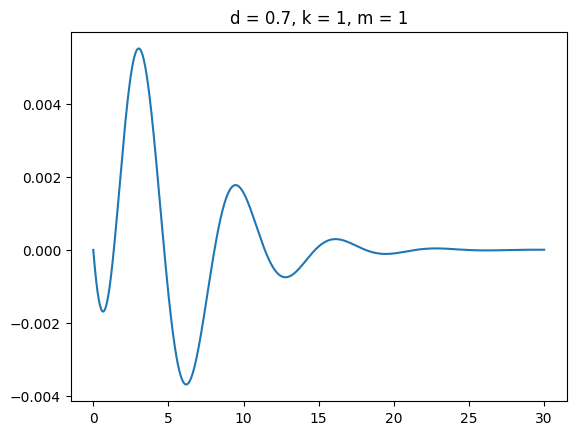

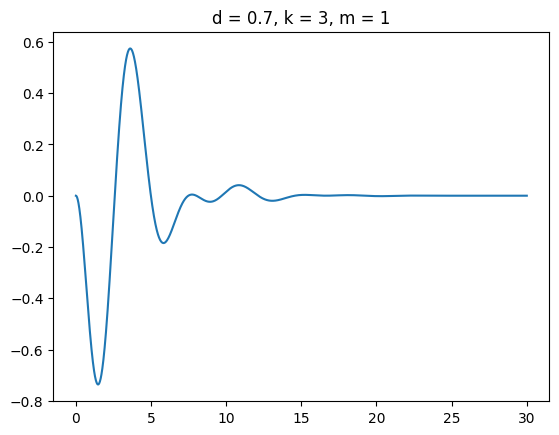

In [9]:
error1 = lambdify(x, solve_analytic(0.7, 1, 1))(t) - solve_euler(0.7, 1, 1)
fig1, ax1 = plt.subplots()
ax1.set_title("d = 0.7, k = 1, m = 1")
ax1.plot(t, error1)

error2 = lambdify(x, solve_analytic(0.7, 3, 1))(t) - solve_euler(0.7, 1, 1)
_, ax2 = plt.subplots()
ax2.set_title("d = 0.7, k = 3, m = 1")
ax2.plot(t, error2)

We can see that the estimation error seems to grow a lot more when the stiffness of the spring increases, which is not surprising as an increase in stiffness leads to higher frequencies of the position, which leads to errors because of steeper slopes which the euler method does not manage to take into account.

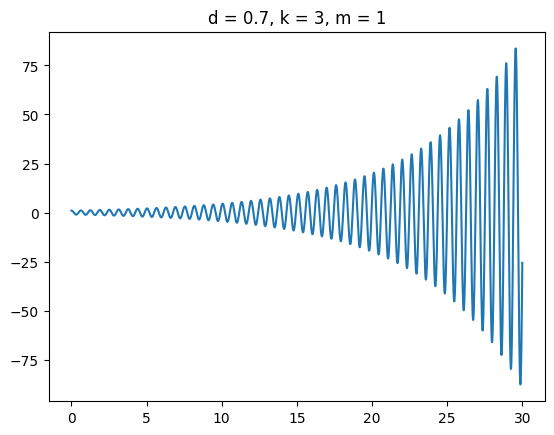

In [10]:
experiment = solve_euler(0.7, 100, 1)
_, ax3 = plt.subplots()
ax3.set_title("d = 0.7, k = 3, m = 1")
ax3.plot(t, experiment)

With high enough stiffness the simulation becomes unstable. It was unfortunately not possible to compare it to the analytic solution as the recursion took too long and could not solve the ODE.